## Libraries

In [274]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from fast_ml.model_development import train_valid_test_split
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
import copy

## Reading Data

In [275]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Taking a deepcopy of the data

In [276]:
df = copy.deepcopy(df)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Describe and Informations about data

In [277]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [279]:
df.shape

(284807, 31)

## Check for missing values

In [280]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [281]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Scaling

In [282]:
rob = RobustScaler()

df['scaled_amount'] = rob.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

## Check for unbalance data

In [283]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [284]:
Counter(df['Class'])

Counter({0: 284315, 1: 492})

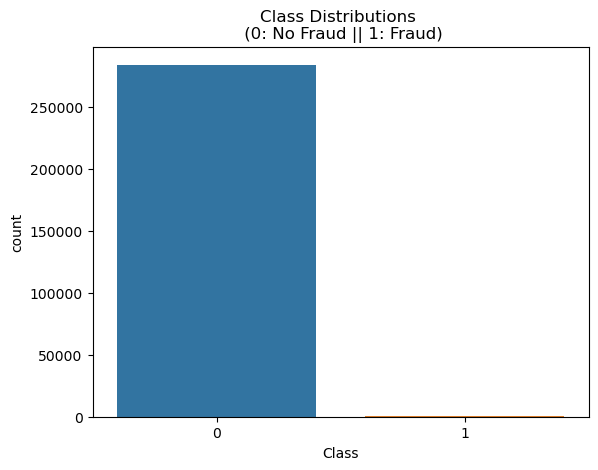

In [285]:
sns.countplot(x='Class', data= df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')
plt.show()

## Handling unbalanced data

### Random Over Sampling

In [286]:
X = df.drop('Class', axis=1)
Y = df['Class']

In [287]:
from imblearn.over_sampling import RandomOverSampler

In [288]:
ROS = RandomOverSampler(sampling_strategy=0.5 ,random_state=42)
Xresampled, Yresampled = ROS.fit_resample(X, Y)

In [289]:
Counter(Yresampled)

Counter({0: 284315, 1: 142157})

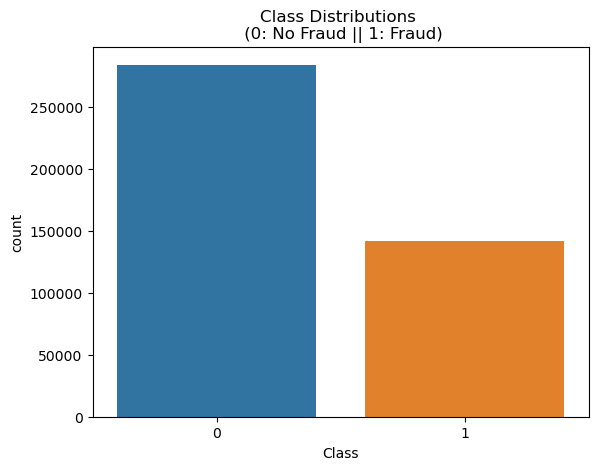

In [290]:
sns.countplot(x=Yresampled, data= df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')
plt.show()

### Random Under Sampling

In [291]:
from imblearn.under_sampling import RandomUnderSampler

In [292]:
RUS = RandomUnderSampler(random_state=42)
Xresampled, Yresampled = RUS.fit_resample(Xresampled, Yresampled)

In [293]:
Counter(Yresampled)

Counter({0: 142157, 1: 142157})

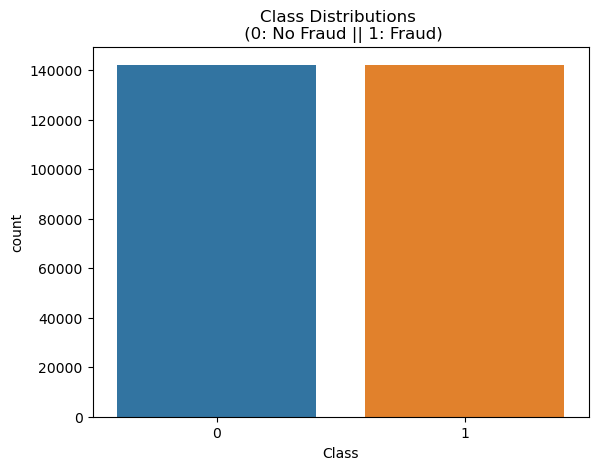

In [294]:
sns.countplot(x=Yresampled, data= df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')
plt.show()

## Correlation Analysis

In [295]:
df = Xresampled
df_new = pd.concat([df, Yresampled], axis=1)
df_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
138028,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,-0.597739,...,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,-0.296793,-0.026340,0
63099,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,0.170547,...,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,-0.249004,-0.401062,0
73411,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,2.051312,...,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,-0.097813,-0.347361,0
164247,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,-1.238598,...,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,0.489066,0.374534,0
148999,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,1.166335,...,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,-0.307413,0.067458,0


In [296]:
df_new.shape

(284314, 31)

In [297]:
Correlation = df_new.corr()
Correlation

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
V1,1.000000,-0.788462,0.878205,-0.613065,0.857023,0.308853,0.878813,-0.071714,0.655762,0.737987,...,-0.035917,-0.048271,-0.067303,-0.077561,0.058696,0.187944,0.176464,-0.040296,0.242068,-0.431554
V2,-0.788462,1.000000,-0.851564,0.669480,-0.786396,-0.269483,-0.841599,-0.028683,-0.694809,-0.764521,...,-0.008315,0.147917,-0.004294,0.110052,-0.004829,-0.157484,0.011582,-0.241265,-0.219360,0.488966
V3,0.878205,-0.851564,1.000000,-0.769780,0.850821,0.449064,0.884513,-0.163852,0.763776,0.855763,...,-0.063423,-0.032358,0.014559,-0.086106,-0.010844,0.100832,0.122934,-0.013078,0.151763,-0.566227
V4,-0.613065,0.669480,-0.769780,1.000000,-0.576703,-0.422644,-0.706269,0.097777,-0.787699,-0.792909,...,0.116051,0.022160,-0.078948,-0.022054,0.141359,-0.008392,-0.067865,0.011602,-0.215941,0.709914
V5,0.857023,-0.786396,0.850821,-0.576703,1.000000,0.274889,0.829883,-0.197455,0.656546,0.755740,...,-0.094509,-0.085695,-0.132388,-0.082518,0.062397,0.180280,0.161041,-0.124739,0.283386,-0.373440
V6,0.308853,-0.269483,0.449064,-0.422644,0.274889,1.000000,0.278448,-0.568877,0.361085,0.414121,...,0.001255,0.316298,-0.021261,-0.132307,-0.036549,-0.160395,-0.033667,0.180195,0.110731,-0.394305
V7,0.878813,-0.841599,0.884513,-0.706269,0.829883,0.278448,1.000000,0.096766,0.760418,0.863951,...,-0.116425,-0.093923,-0.040681,0.050571,0.026652,0.232737,0.140902,0.135684,0.218433,-0.474159
V8,-0.071714,-0.028683,-0.163852,0.097777,-0.197455,-0.568877,0.096766,1.000000,-0.070139,-0.046143,...,0.036399,-0.417670,0.073266,0.229286,0.044302,0.286896,-0.012228,0.017037,-0.138320,0.055164
V9,0.655762,-0.694809,0.763776,-0.787699,0.656546,0.361085,0.760418,-0.070139,1.000000,0.847693,...,-0.241297,-0.053815,0.015604,-0.010236,-0.122399,0.126301,0.131156,0.022092,0.162249,-0.557923
V10,0.737987,-0.764521,0.855763,-0.792909,0.755740,0.414121,0.863951,-0.046143,0.847693,1.000000,...,-0.210280,-0.052781,0.004198,0.021579,-0.029912,0.147564,0.125350,0.001433,0.217703,-0.626394


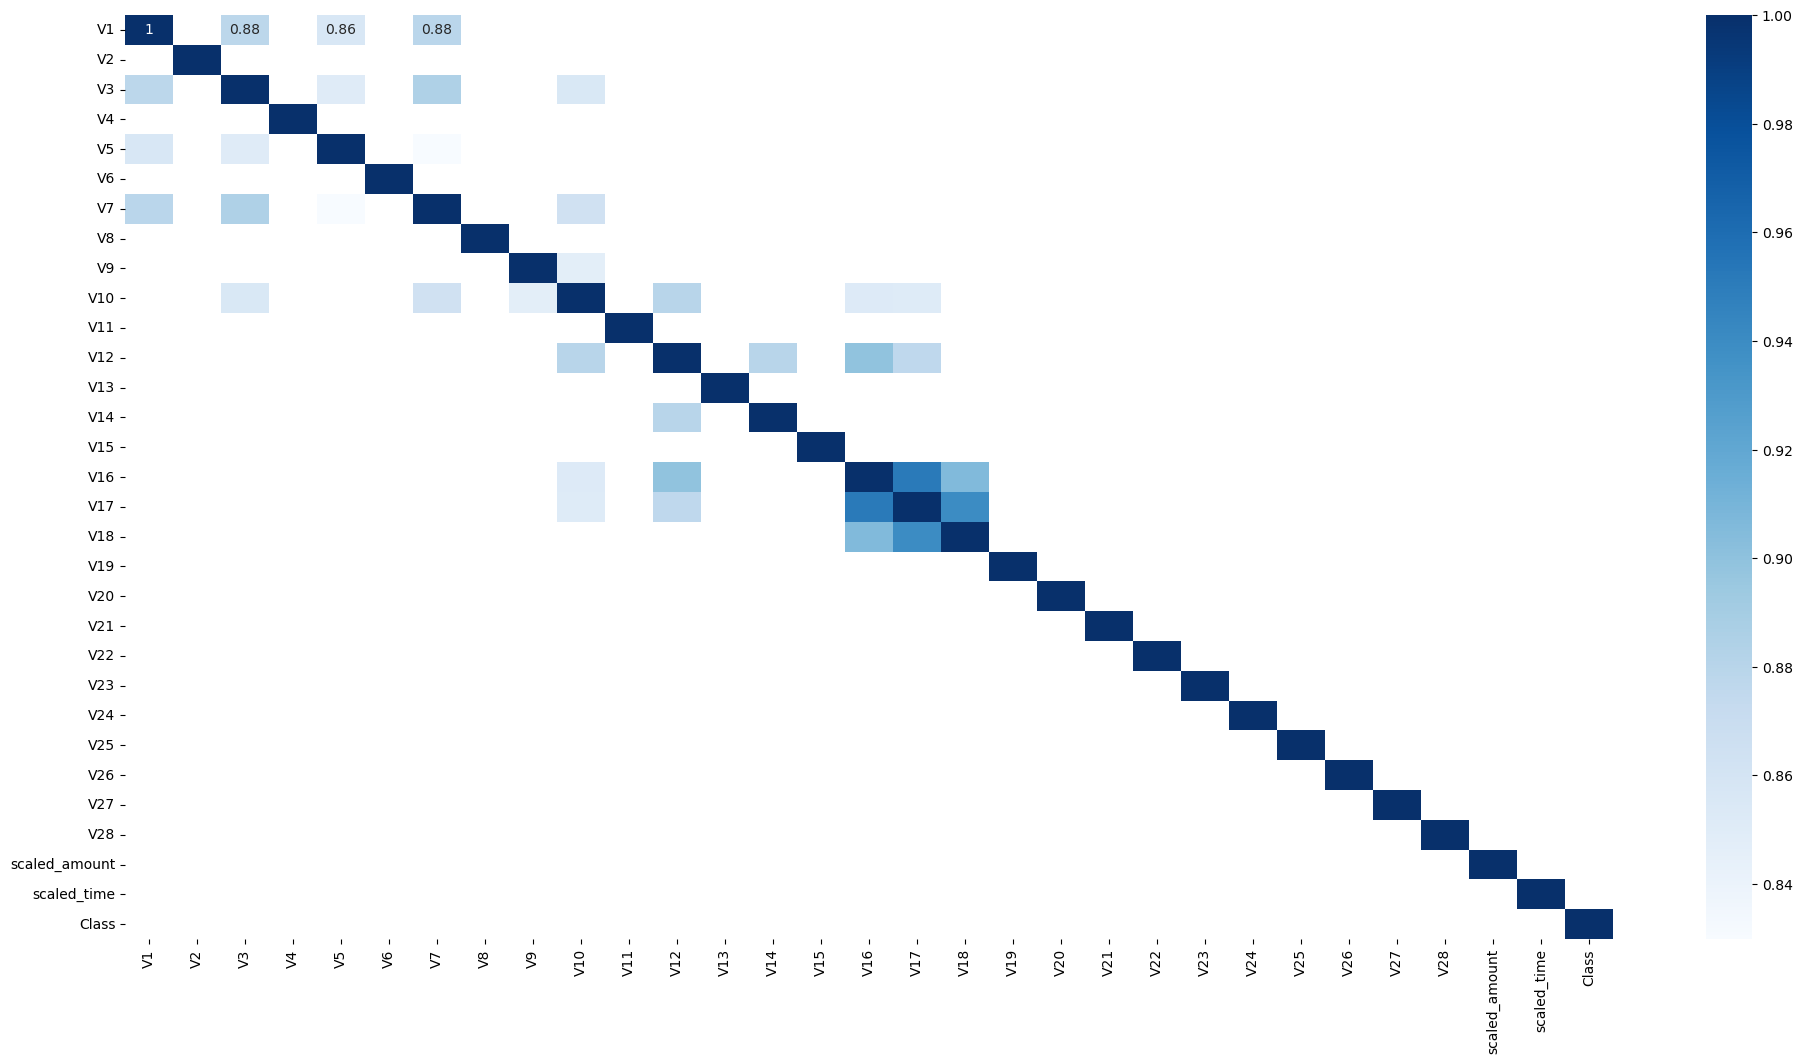

In [298]:
plt.figure(figsize=(24, 12))
sns.heatmap(Correlation, annot=True, mask=Correlation<.8, cmap='Blues')
plt.show()

## Statistical Graph

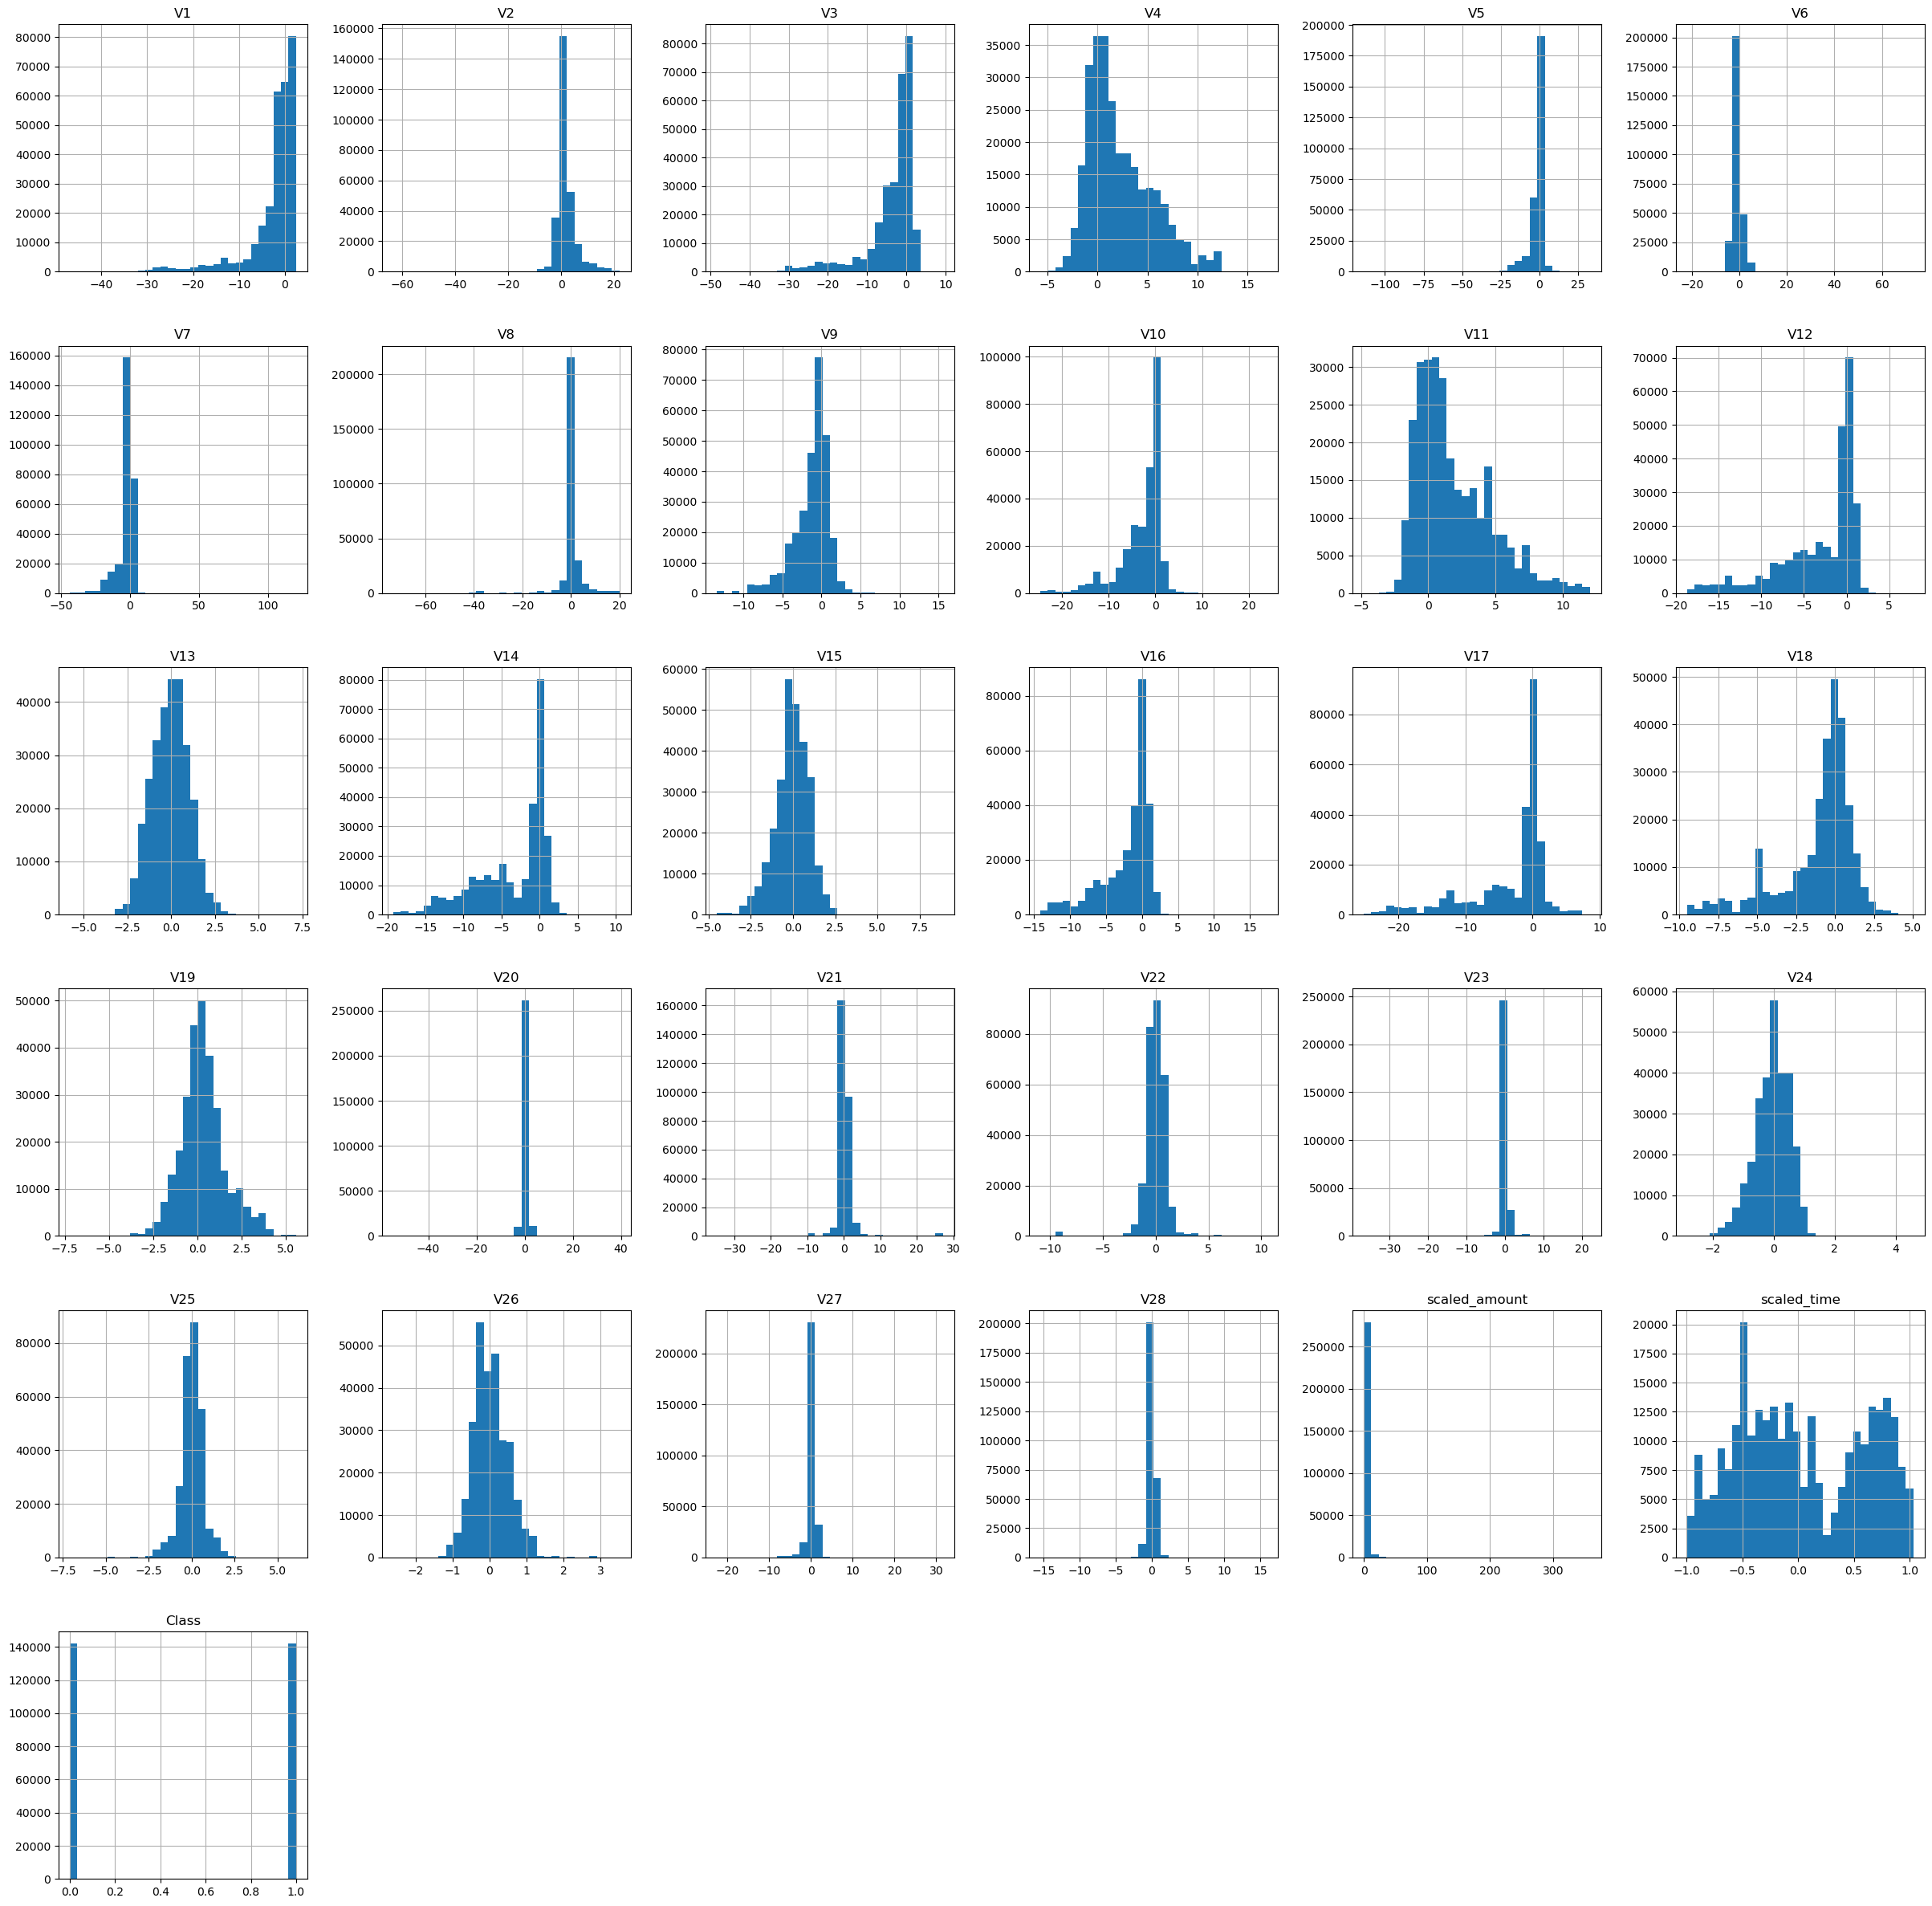

In [299]:
df_new.hist(bins=30, figsize=(30, 30))
plt.show()

## Split the data to train, validation, test

In [300]:
X = df_new.drop('Class', axis=1)
Y = df_new['Class']

In [301]:
Xtrain, Ytrain, Xvalid, Yvalid, Xtest, Ytest = train_valid_test_split(df_new, target='Class',train_size=.7 , valid_size=.1 , test_size=.2 , random_state=42)

In [302]:
#from sklearn.preprocessing import StandardScaler
#Scaler = StandardScaler() 
#Xtrain = Scaler.fit_transform(Xtrain)
#Xvalid = Scaler.transform(Xvalid)
#Xtest = Scaler.transform(Xtest)

In [303]:
from sklearn.feature_selection import SelectKBest,f_classif 

In [304]:
Fs = SelectKBest(f_classif, k=8)
Fs.fit(Xtrain, Ytrain)
Xtrain = Fs.transform(Xtrain)
Xvalid = Fs.transform(Xvalid)
Xtest = Fs.transform(Xtest)

In [305]:
Fs.get_feature_names_out()

array(['V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'], dtype=object)

## Gradient Boosting Classifier Model

In [306]:
#from sklearn.model_selection import GridSearchCV
#Model = GradientBoostingClassifier(random_state=42)
#param_grid = {
#    'learning_rate': [0.5, 1.0, 2.0],
#    'n_estimators': [100, 200, 300],
#    'max_depth': [3, 4, 5]
#}
#GS = GridSearchCV(Model, param_grid, scoring='precision', cv=5)
#GS.fit(Xtrain,Ytrain)

In [307]:
#GS.best_params_

In [308]:
#Grad_estimator=GS.best_estimator_

In [309]:
Grad_estimator = GradientBoostingClassifier(
    n_estimators=75,
    learning_rate=1.0, 
    max_depth=2,
    random_state=42)
Grad_estimator.fit(Xtrain, Ytrain)

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=75,
                           random_state=42)

## Evaluation

In [310]:
Ypred = Grad_estimator.predict(Xtest)

In [311]:
confusion_matrix(Ytest, Ypred)

array([[28192,   154],
       [    0, 28518]], dtype=int64)

<Axes: >

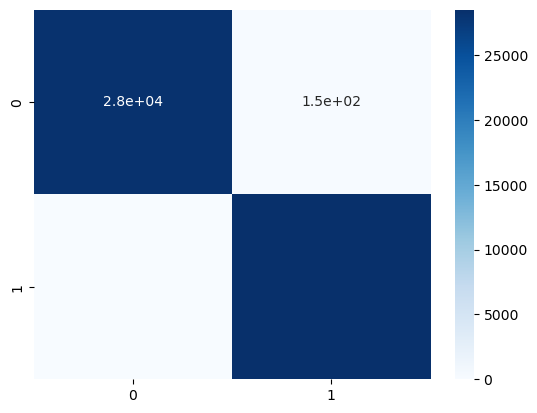

In [312]:
sns.heatmap(confusion_matrix(Ytest, Ypred), annot=True, cmap='Blues')

In [313]:
precision_score(Ytest, Ypred)

0.99462890625

## Check OverFitting

In [314]:
Xtrain_Pred = Grad_estimator.predict(Xtrain)
Xvalid_Pred = Grad_estimator.predict(Xvalid)

In [315]:
precision_score(Xtrain_Pred, Ytrain)

1.0

In [316]:
precision_score(Xvalid_Pred, Yvalid)

1.0

In [317]:
confusion_matrix(Xvalid_Pred, Yvalid)

array([[14168,     0],
       [   72, 14191]], dtype=int64)

<Axes: >

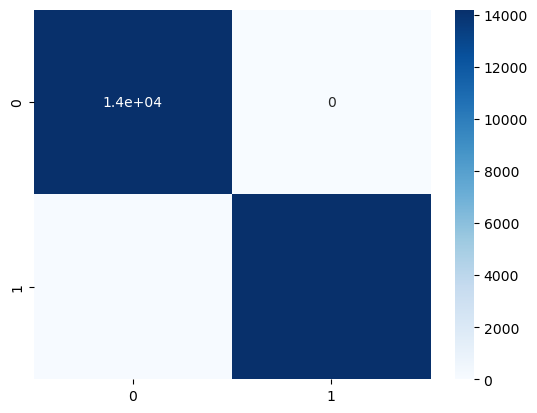

In [318]:
sns.heatmap(confusion_matrix(Xvalid_Pred, Yvalid), annot=True, cmap='Blues')